# Plotting pipeline for single peptide

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy.stats import chi2

# to read mzML files
from pyteomics import mzml

# to visualize MS/MS and obtain ground truth
from pyteomics import pylab_aux as pa
from pyteomics import mass

# to find peaks
from scipy.signal import find_peaks

In [2]:
sns.set_theme(rc={'figure.figsize':(20,6)})

In [30]:
peptide = "AFMTADLPNELIELLEK"

In [31]:
pep_df = pd.read_csv(f"../habrok_output/{peptide}_fits.csv")

In [32]:
sorted_pep_df = pep_df.sort_values(by=["combined_p"], ascending=True).reset_index()

In [33]:
sorted_pep_df

,level_0,Unnamed: 0,index,sequence,peaks,len_pep,rank_sum,rank_p,SSE,mz_fid_p,combined_p
0,0,0,6945,"['YW', 'T', 'A', 'TQ', 'KF', 'KY', 'E', 'L', '...","[1948.022185, 1598.873901, 1497.823364, 1426.7...",11,117,0.000041,0.000521,0.000001,1.021615e-09
1,1,1,6942,"['YW', 'T', 'A', 'TQ', 'KF', 'KY', 'E', 'L', '...","[1948.022185, 1598.873901, 1497.823364, 1426.7...",11,118,0.000061,0.000530,0.000001,1.495729e-09
2,2,2,6940,"['YW', 'T', 'A', 'TQ', 'KF', 'KY', 'E', 'LL', ...","[1948.022185, 1598.873901, 1497.823364, 1426.7...",11,129,0.000091,0.000527,0.000001,2.194935e-09
3,3,3,6775,"['YW', 'T', 'A', 'TQ', 'CO', 'LL', 'E', 'L', '...","[1948.022185, 1598.873901, 1497.823364, 1426.7...",11,129,0.000091,0.000539,0.000001,2.194935e-09
4,4,4,6772,"['YW', 'T', 'A', 'TQ', 'CO', 'LL', 'E', 'L', '...","[1948.022185, 1598.873901, 1497.823364, 1426.7...",11,130,0.000101,0.000703,0.000001,2.425606e-09
...,...,...,...,...,...,...,...,...,...,...,...
17533,17533,17533,10473,"['TW', 'LF', 'E', 'HW', 'LW', 'G', 'SH']","[np.float64(1598.873901), 1311.757568, 1051.56...",8,210,0.696241,0.011569,0.992441,9.463962e-01
17534,17534,17534,9513,"['EY', 'VR', 'E', 'HW', 'O', 'AA', 'SN']","[np.float64(1598.873901), 1306.718628, 1051.56...",8,219,0.777471,0.009089,0.914571,9.535278e-01
17535,17535,17535,9509,"['EY', 'VR', 'E', 'HW', 'LW', 'G', 'SH']","[np.float64(1598.873901), 1306.718628, 1051.56...",8,225,0.824821,0.008555,0.873661,9.567243e-01
17536,17536,17536,9515,"['EY', 'VR', 'E', 'HW', 'O', 'G', 'GT', 'K']","[np.float64(1598.873901), 1306.718628, 1051.56...",9,239,0.732591,0.012053,0.983831,9.567675e-01


In [34]:
sorted_pep_df["norm_rank_p"]= sorted_pep_df["rank_p"] / np.sum(sorted_pep_df["rank_p"])
sorted_pep_df["norm_mz_fid_p"]= sorted_pep_df["mz_fid_p"] / np.sum(sorted_pep_df["mz_fid_p"])

In [35]:
def fisher_combined_vector(p1_array, p2_array):
    chi_stat = -2 * (np.log(p1_array) + np.log(p2_array))
    return chi2.sf(chi_stat, df=4)

In [36]:
pep_df["combined_p"] = fisher_combined_vector(pep_df["rank_p"].values, pep_df["mz_fid_p"].values)

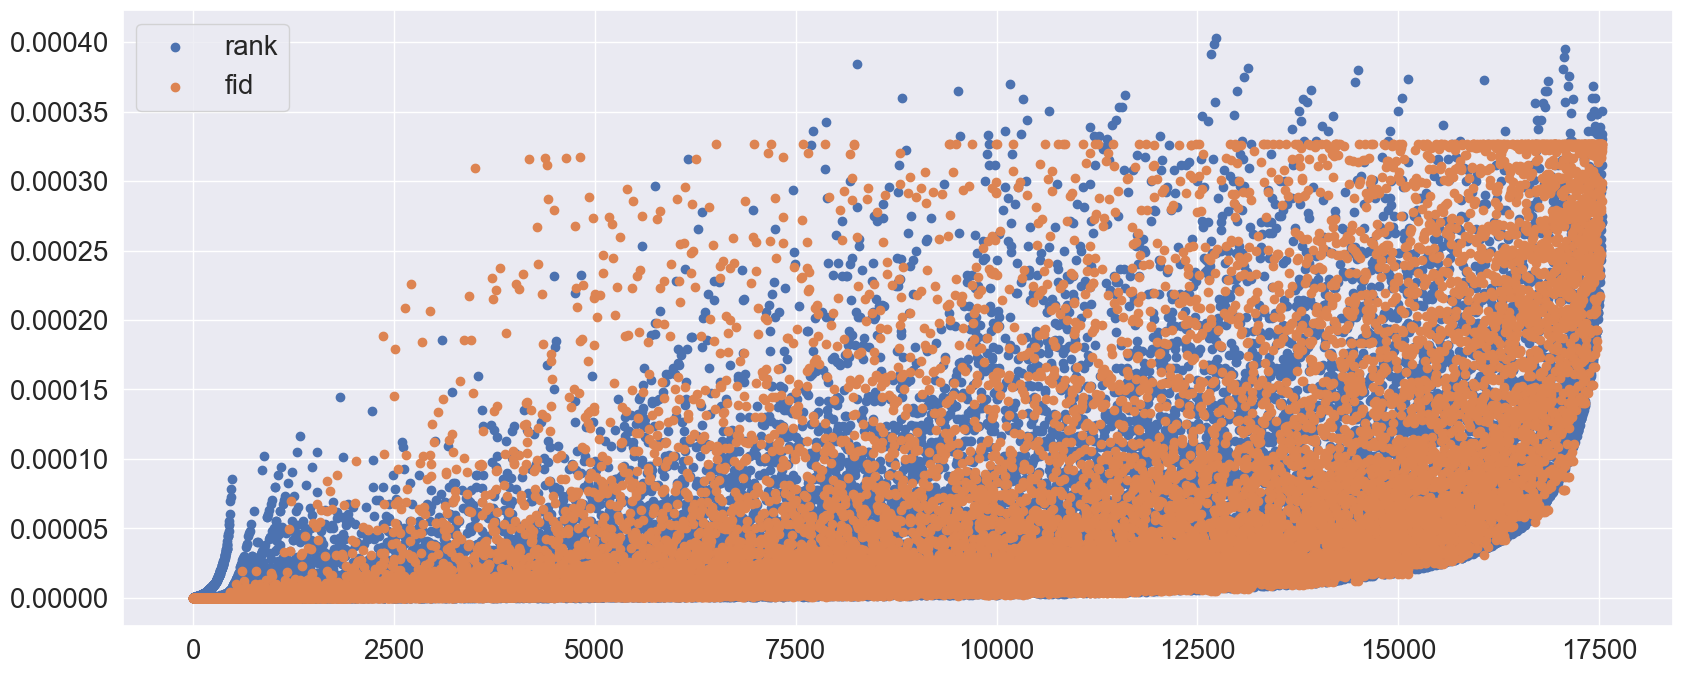

In [37]:
plt.scatter(
    sorted_pep_df.index,
    sorted_pep_df["norm_rank_p"],
    label="rank"
)
plt.scatter(
    sorted_pep_df.index,
    sorted_pep_df["norm_mz_fid_p"],
    label="fid"
)
plt.legend()
plt.show()

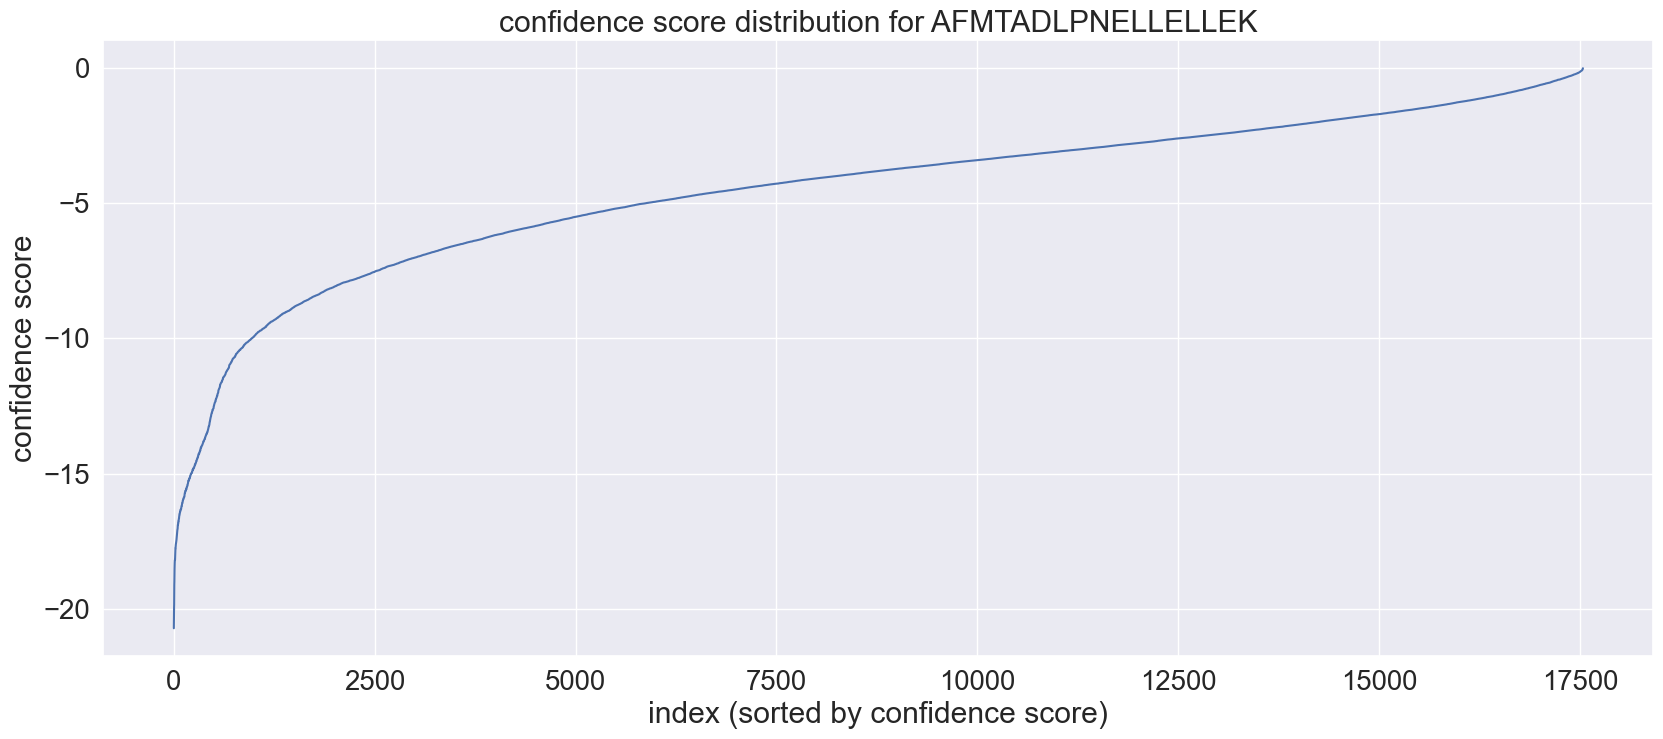

In [39]:
p_dist_data = {
    "x":sorted_pep_df.index,
    "y":sorted_pep_df["combined_p"]
}

plt.plot(
    p_dist_data["x"],
    np.log(p_dist_data["y"])
)
plt.title(f"confidence score distribution for AFMTADLPNELLELLEK")

# plt.savefig(f'../graphs/{peptide}/{peptide}p_score.png')
plt.xlabel("index (sorted by confidence score)")
plt.ylabel("confidence score")
plt.show()

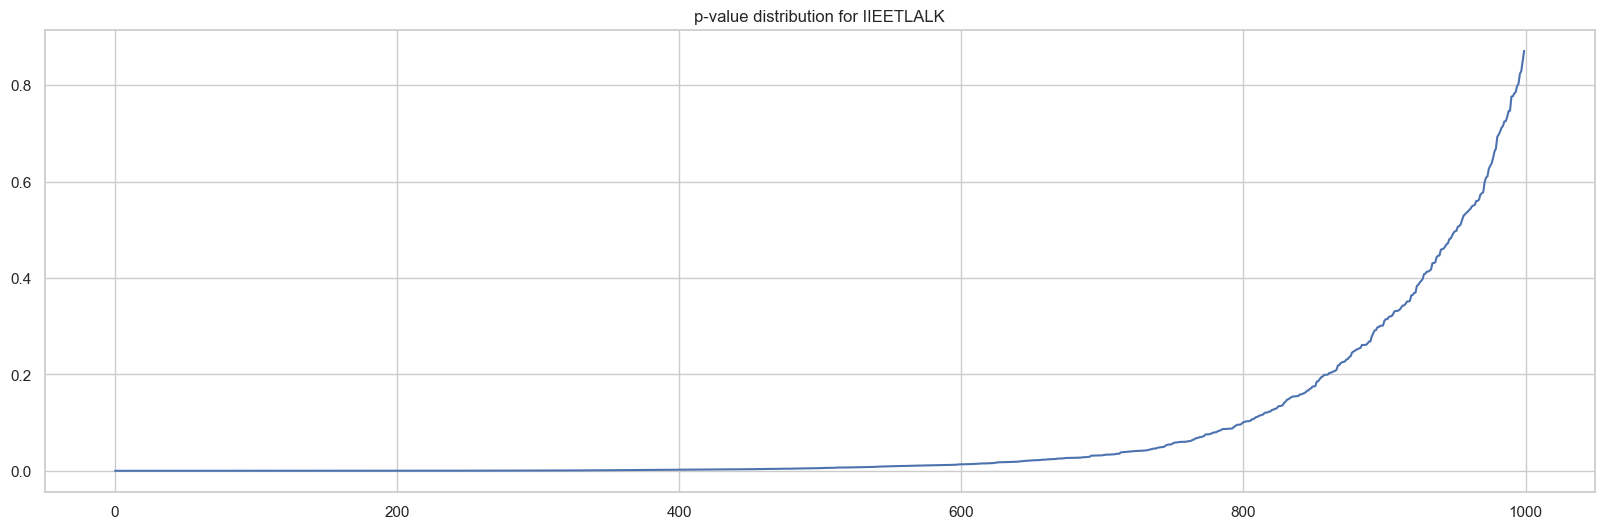

In [16]:
# p-value distribution

p_dist_data = {
    "x":sorted_pep_df.index,
    "y":sorted_pep_df["combined_p"]
}

plt.plot(
    p_dist_data["x"],p_dist_data["y"]
)
plt.title(f"p-value distribution for {peptide}")

plt.savefig(f'../graphs/{peptide}/{peptide}p_score.png')
plt.show()

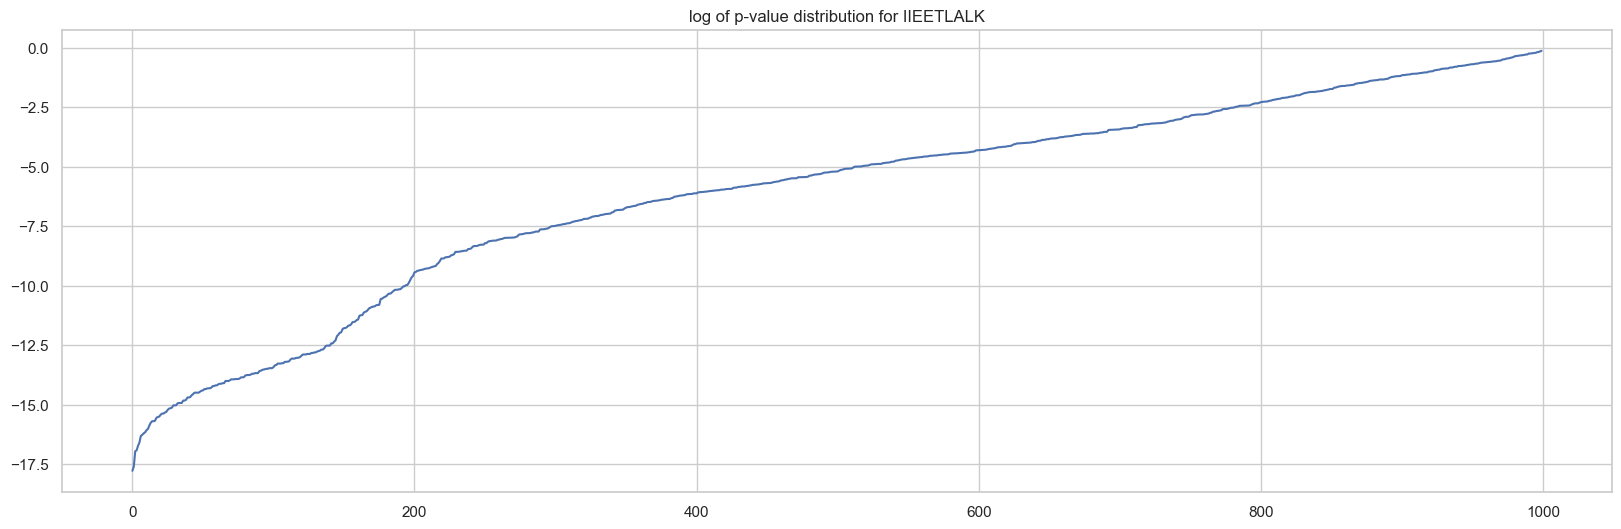

In [17]:
# log of p-value distribution

plt.plot(
    p_dist_data["x"],
    np.log(p_dist_data["y"])
)
plt.title(f"log of p-value distribution for {peptide}")

plt.savefig(f'../graphs/{peptide}/{peptide}_log_p_score.png')
plt.show()

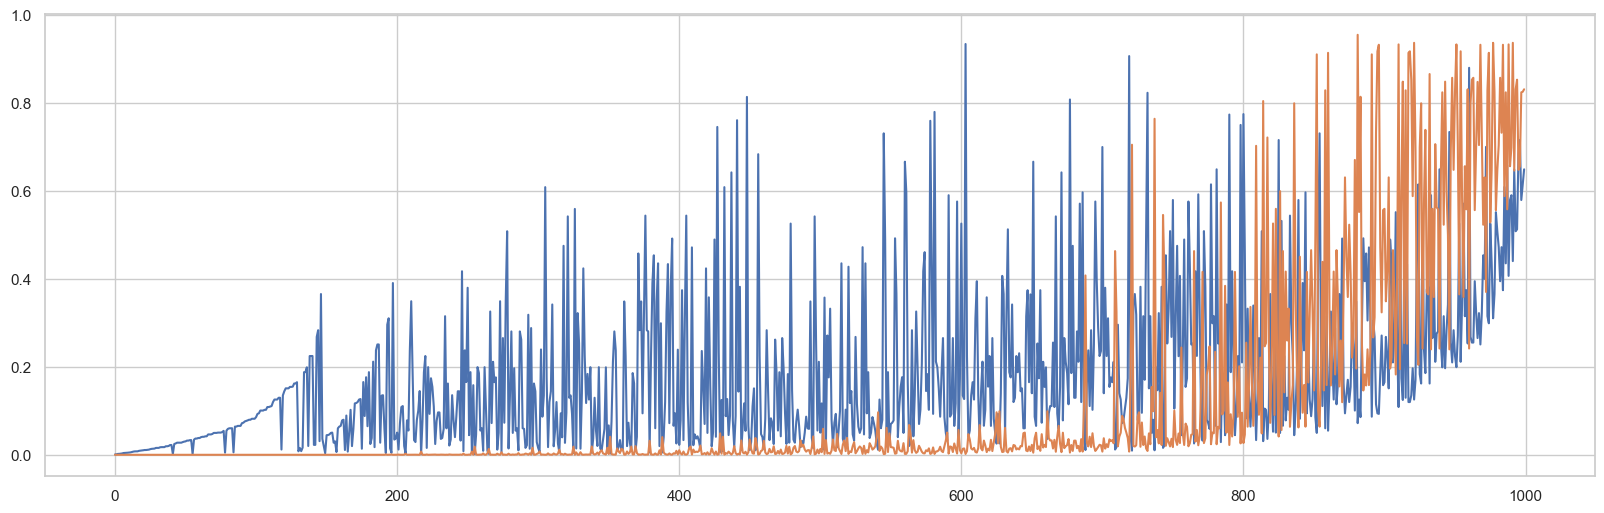

In [18]:
# combination of m/z_p and int_p distribtution
plt.plot(
    sorted_pep_df.index,
    sorted_pep_df["rank_p"]
)
plt.plot(
    sorted_pep_df.index,
    sorted_pep_df["mz_fid_p"]
)

plt.show()

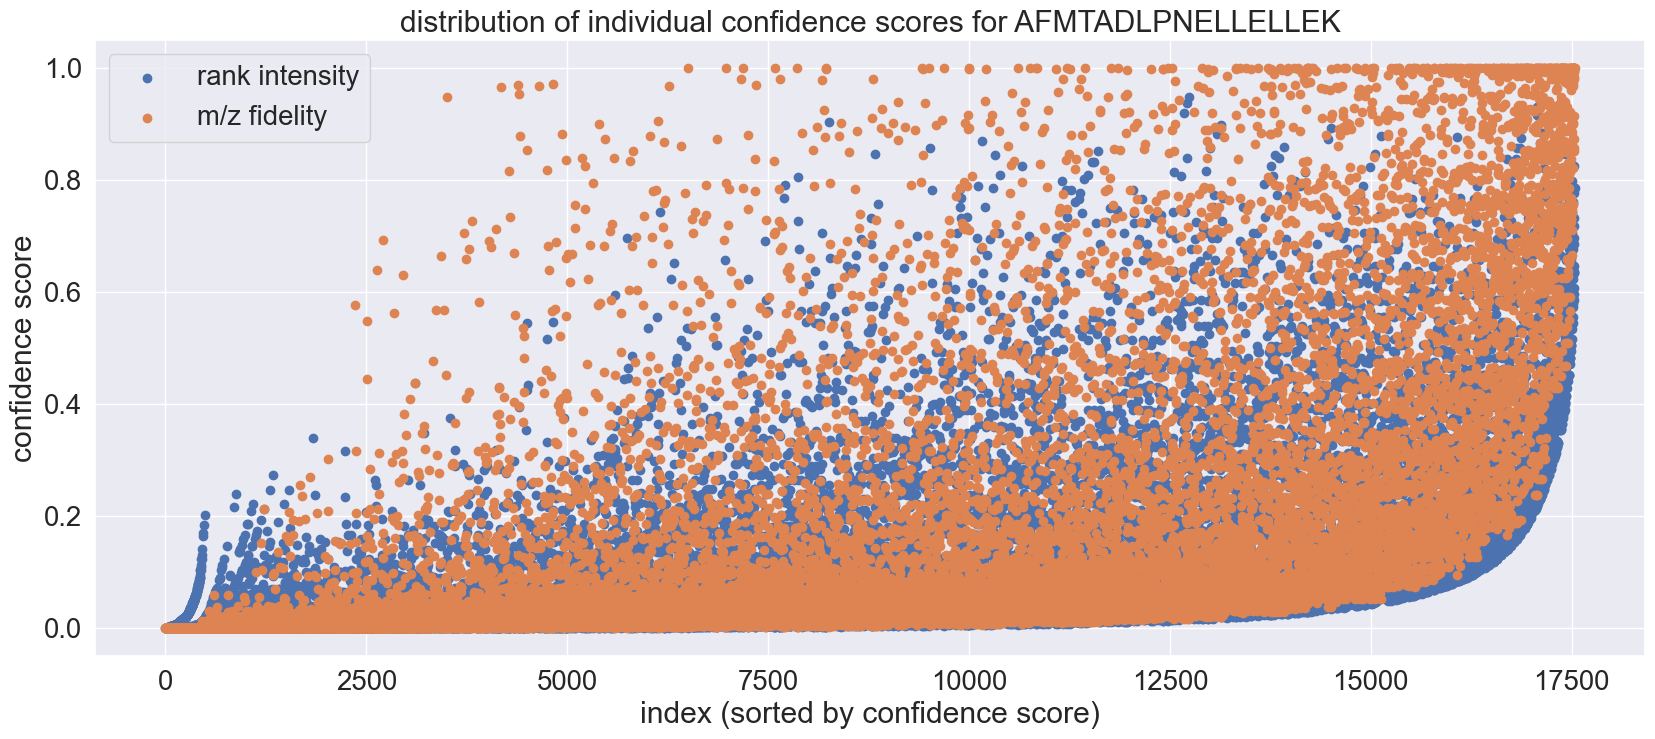

In [46]:
sns.set_theme(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.8)


plt.scatter(
    sorted_pep_df.index,
    sorted_pep_df["rank_p"],
    label="rank intensity"
)
plt.scatter(
    sorted_pep_df.index,
    sorted_pep_df["mz_fid_p"],
    label="m/z fidelity"
)
plt.title(f"distribution of individual confidence scores for AFMTADLPNELLELLEK")

# plt.xscale('log')
plt.xlabel("index (sorted by confidence score)")
# plt.yscale('log')
plt.ylabel("confidence score")
plt.legend()
plt.show()

In [27]:

top_50 = {
    "x":sorted_pep_df.index[0:50],
    "y":sorted_pep_df["combined_p"][0:50]
}

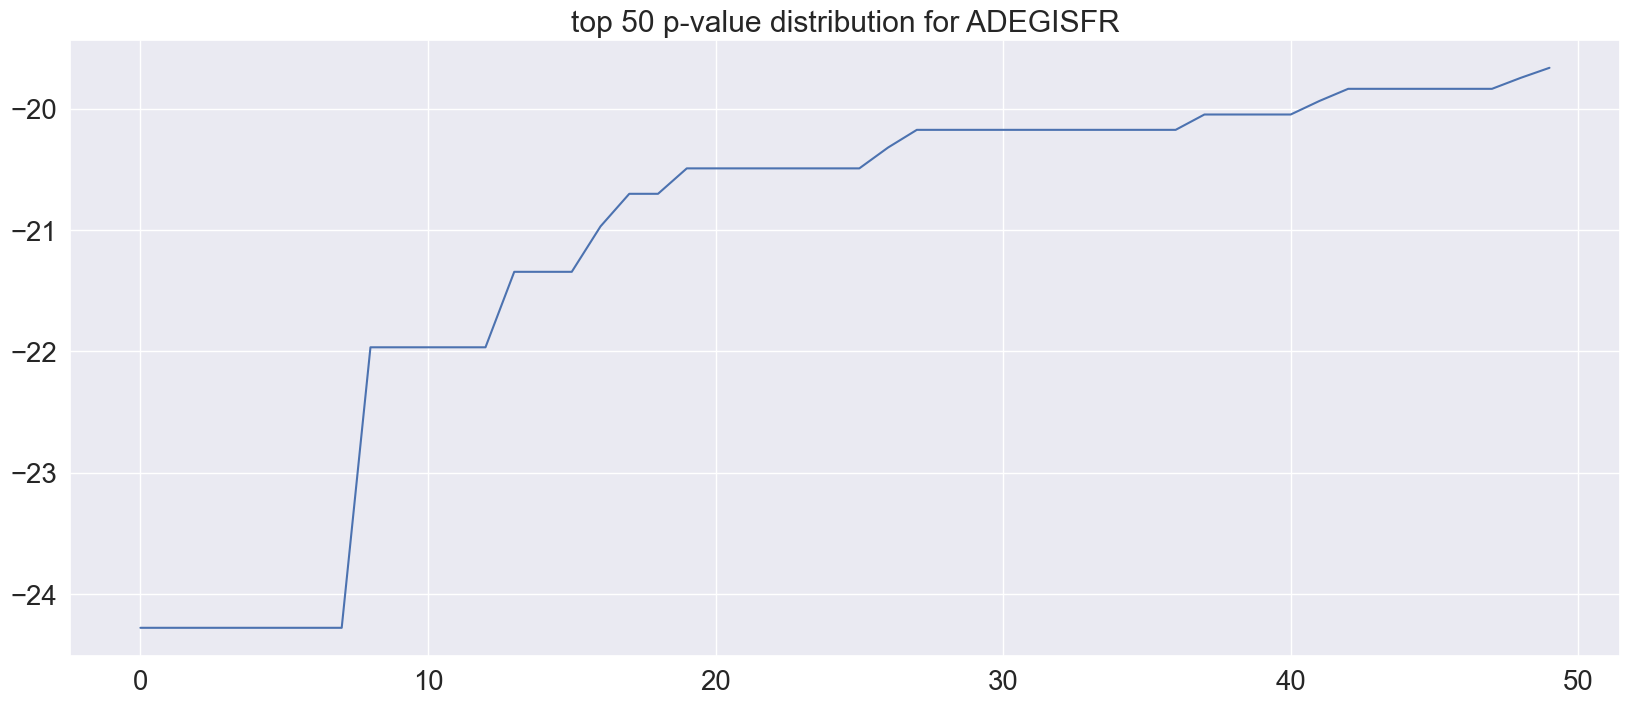

In [28]:
# top 50 p

plt.plot(
    top_50["x"],
    np.log(top_50["y"])
)
plt.title(f"top 50 p-value distribution for {peptide}")

#plt.savefig(f'../graphs/{peptide}/{peptide}top50_p_score.png')
plt.show()

In [29]:
top_10 = {
    "x":sorted_pep_df.index[0:10],
    "y":sorted_pep_df["combined_p"][0:10]
}

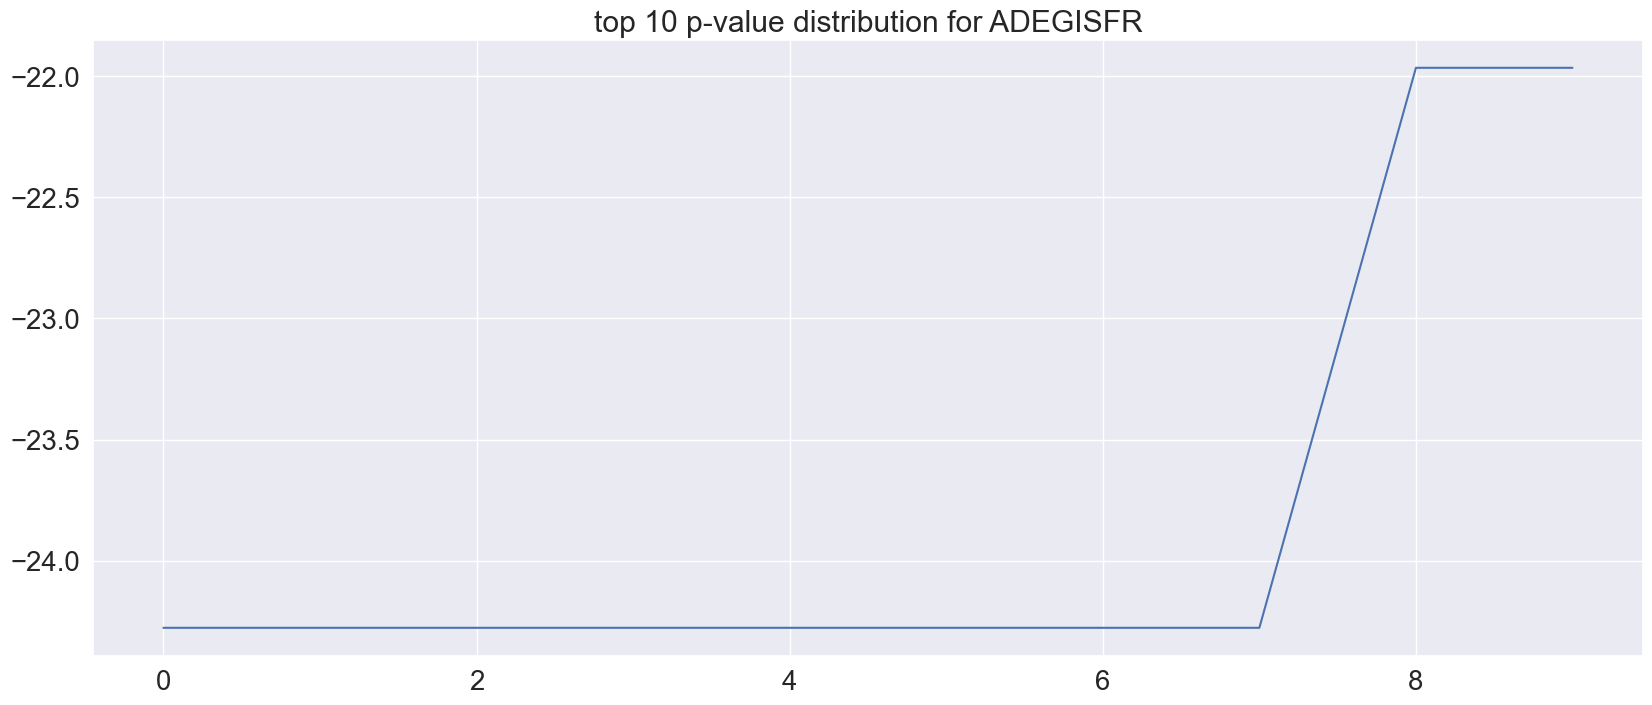

In [30]:
# top 10 p

plt.plot(
    top_10["x"],
    np.log(top_10["y"])
)
plt.title(f"top 10 p-value distribution for {peptide}")

#plt.savefig(f'../graphs/{peptide}/{peptide}top10_p_score.png')
plt.show()

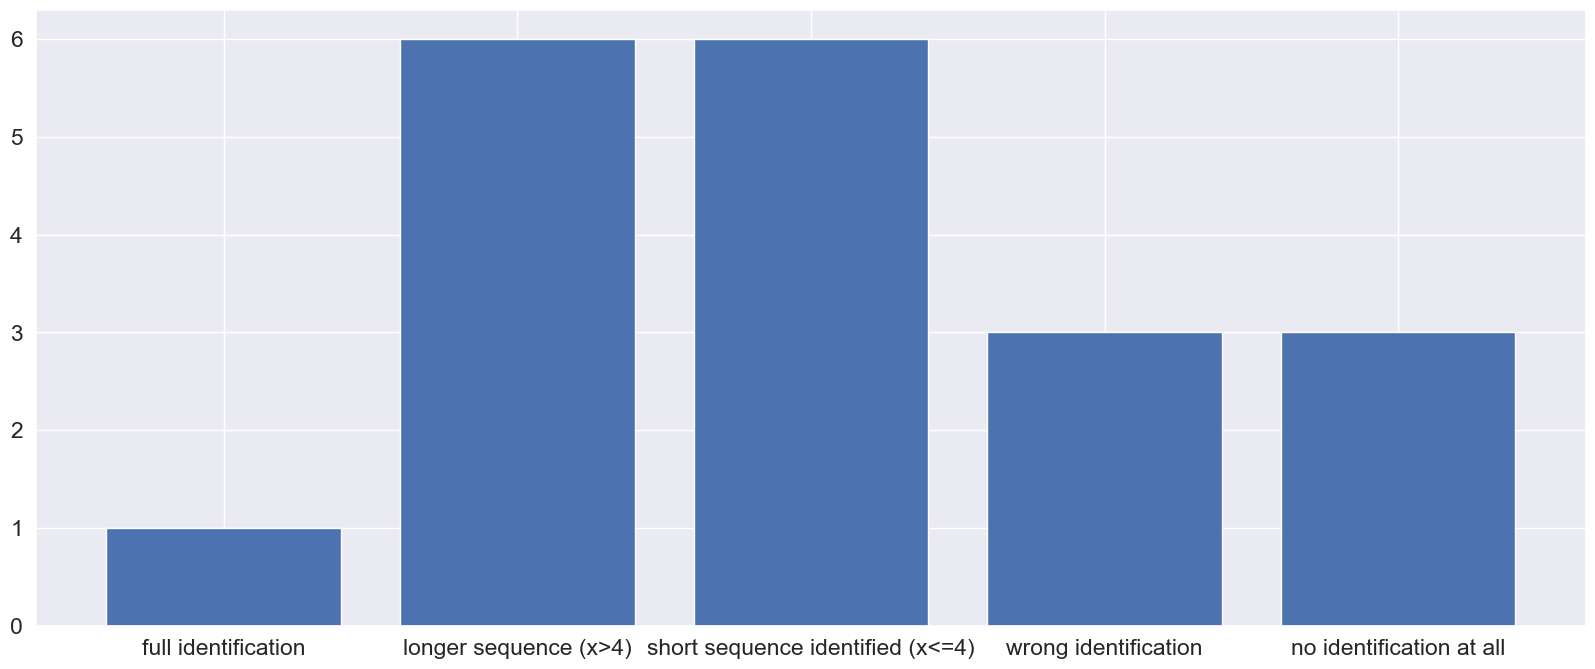

In [31]:
sns.set(font_scale=1.5)
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 1}

plt.rc('font', **font)
experiment_results = {
    "full identification": 1,
    "longer sequence (x>4)": 6,
    "short sequence identified (x<=4)": 6,
    "wrong identification": 3,
    "no identification at all": 3
}
plt.bar(experiment_results.keys(), experiment_results.values(), 0.8)
plt.show()

In [32]:
# more than 5 ident
# shannon ent
# shannon ent over p

In [24]:
#shannon ent
pep_df["prob_of_outcome"]= pep_df["combined_p"] / np.sum(pep_df["combined_p"])

In [25]:
def shannon(df):
    entropy = - np.sum(df["prob_of_outcome"] * np.log2(df["prob_of_outcome"]))
    return entropy

In [26]:
shannon(pep_df)

8.0171531957881

In [35]:
entropy_of_sample = np.sum(pep_df["prob_of_outcome"]* np.log2(pep_df["prob_of_outcome"]))

In [36]:
entropy_of_sample

-9.647540544866198

In [37]:
mz_path = '../data/2015-05-19_MRC5_a.mzML'

In [38]:
with mzml.MzML(mz_path) as reader:
    for spectrum in reader:
        speptrum = spectrum
        break

In [39]:
speptrum

{'index': 0,
 'id': 'controllerType=0 controllerNumber=1 scan=1',
 'defaultArrayLength': 1403,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 400.0 m/z,
       'scan window upper limit': 1800.0 m/z}]},
    'scan start time': 0.0032616642 minute,
    'mass resolving power': 70000.0,
    'filter string': 'FTMS + p NSI Full ms [400.00-1800.00]',
    'preset scan configuration': 1.0,
    'ion injection time': 50.000000745058 millisecond}],
  'no combination': ''},
 'MS1 spectrum': '',
 'ms level': 1,
 'positive scan': '',
 'centroid spectrum': '',
 'base peak m/z': 445.1269245 m/z,
 'base peak intensity': 301762.25 number of detector counts,
 'total ion current': 7235549.0,
 'lowest observed m/z': 400.259796142578 m/z,
 'highest observed m/z': 1614.238159179688 m/z,
 'spectrum title': '2015-05-19_MRC5_a.1.1. File:"2015-05-19_MRC5_a.raw", NativeID:"controllerType=0 controllerNumber=1 scan=1"',
 'count': 2,
 'm/z array': a